In [2]:
try:
    import seaborn as sns
except ModuleNotFoundError:
    print("Installing seaborn...")
    %pip install seaborn
    import seaborn as sns

Installing seaborn...


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [4]:
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

In [7]:
transaction_summary = transactions.groupby('CustomerID').agg(
    TotalSpent=('TotalValue', 'sum'),
    TransactionCount=('TransactionID', 'count')
).reset_index()
customer_data = pd.merge(customers, transaction_summary, on='CustomerID')


In [10]:
features = customer_data[['TotalSpent', 'TransactionCount']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


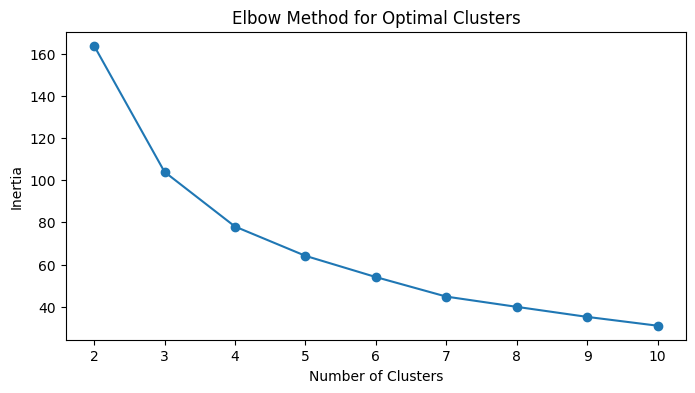

In [12]:
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [26]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)
customer_data['Cluster'] = cluster_labels


In [28]:
db_index = davies_bouldin_score(scaled_features, cluster_labels)
print(f"Davies-Bouldin Index: {db_index}")

silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Davies-Bouldin Index: 0.7662431505517309
Silhouette Score: 0.42351438777086287


In [33]:
cluster_centers = kmeans.cluster_centers_
print("\nCluster Centers is as follows :")
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i}: {center}")
cluster_sizes = customer_data['Cluster'].value_counts()
print("\nThe respective Cluster Sizes are:")
for i, size in cluster_sizes.items():
    print(f"Cluster {i}: {size} customers")



Cluster Centers is as follows :
Cluster 0: [1.42691672 1.40342257]
Cluster 1: [-0.96033833 -0.99519287]
Cluster 2: [0.12859923 0.16588912]

The respective Cluster Sizes are:
Cluster 2: 90 customers
Cluster 1: 70 customers
Cluster 0: 39 customers


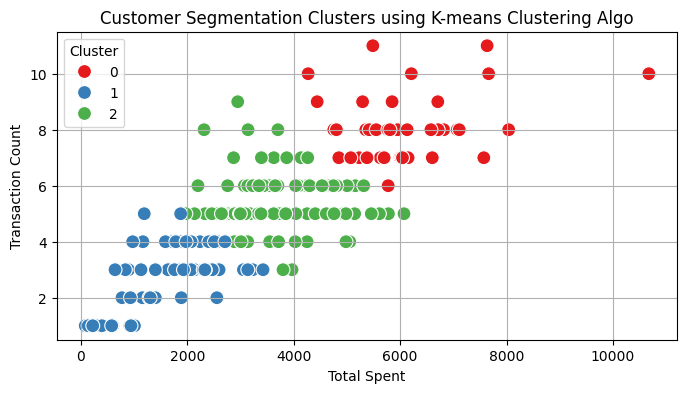

In [35]:
plt.figure(figsize=(8, 4))
sns.scatterplot(
    x=customer_data['TotalSpent'],
    y=customer_data['TransactionCount'],
    hue=customer_data['Cluster'],
    palette="Set1",
    s=100
)
plt.title("Customer Segmentation Clusters using K-means Clustering Algo")
plt.xlabel("Total Spent")
plt.ylabel("Transaction Count")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()